In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

## Cargar el conjunto de datos


In [2]:
# load the dataset
url = 'https://raw.githubusercontent.com/Jaleab/agvd-21b-javier-abarca/main/tareas/tarea_1/dataset_resultante.csv?token=AGUNNMW2FU75F5G5SBPZGDDBJVFE4'
df = pd.read_csv(url)
df.head()

,App,Category,Rating,Reviews,Size (M),Installs (more than),Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art_and_design,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,Art_and_design,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art_and_design,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,Art_and_design,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,Art_and_design,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10839 entries, 0 to 10838
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   App                   10839 non-null  object 
 1   Category              10839 non-null  object 
 2   Rating                9365 non-null   float64
 3   Reviews               10839 non-null  int64  
 4   Size (M)              9144 non-null   float64
 5   Installs (more than)  10839 non-null  int64  
 6   Type                  10838 non-null  object 
 7   Price                 10839 non-null  float64
 8   Content Rating        10839 non-null  object 
 9   Genres                10839 non-null  object 
 10  Last Updated          10839 non-null  object 
 11  Current Ver           10831 non-null  object 
 12  Android Ver           10837 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


## Deteccion de outliers 

### Atributo Installs - IQR



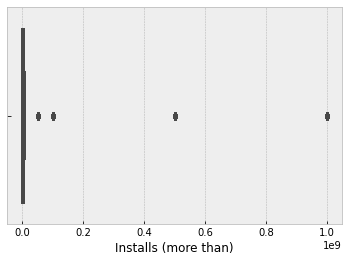

In [4]:
sns.boxplot(x=df['Installs (more than)'])

In [5]:
# identify outliers with interquartile range
from numpy import percentile
# calculate interquartile range
data = df["Installs (more than)"]
q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Percentiles: 25th=1000.000, 75th=5000000.000, IQR=4999000.000
Identified outliers: 828
Non-outlier observations: 10011


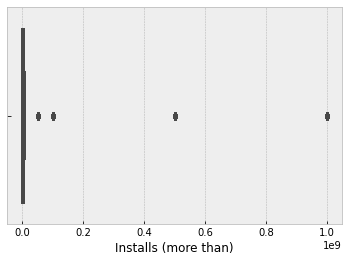

In [6]:
sns.boxplot(x=df['Installs (more than)'])

El método del rango intercuartil encuentra una gran cantidad de outliers en el atributo de instalaciones



## Correlaciones entre atributos numéricos

In [8]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Rating,Reviews,Size (M),Installs (more than),Price
0,4.1,159,19.0,10000,0.0
1,3.9,967,14.0,500000,0.0
2,4.7,87510,8.7,5000000,0.0
3,4.5,215644,25.0,50000000,0.0
4,4.3,967,2.8,100000,0.0


In [9]:
df_num_corr = df_num.corr()['Installs (more than)'][:] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Installs:\n{}".format(len(golden_features_list), golden_features_list))

There is 2 strongly correlated values with Installs:
Installs (more than)    1.000000
Reviews                 0.643121
Name: Installs (more than), dtype: float64


El único atributo con una correlación mayor a 0.5 es el atributo de "Reviews"

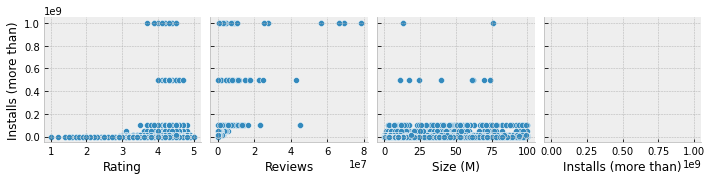

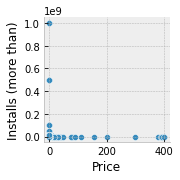

In [10]:
for i in range(0, len(df_num.columns), 4):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+4],
                y_vars=['Installs (more than)'])

En los 4 gráficos (descartando el de instalaciones-instalaciones), no se observan una relacion entre ellos. El atributo "Reviews" relacionado con "Installs" obtuvo un valor de correlación mayor a 0.5, pero esta es leve.

## Estadística descriptiva

In [7]:
# Mínimo
df_num['Installs (more than)'].min()

0

Existen aplicaciones con 0 instalaciones.

In [11]:
from numpy import percentile
# Primer cuartil (25%)
percentile(df_num['Installs (more than)'],25)

1000.0

Una cuarta parte de las aplicaciones de la Play Store tienen menos de 1000 instalaciones.

In [12]:
import statistics
# Mediana
installs_sorted = sorted(df_num['Installs (more than)'])
statistics.median(installs_sorted)

100000

El valor que esta a la mitad de los valores del atributo Installs es 100 000 instalaciones

In [13]:
from numpy import percentile
# Tercer cuartil (75%)
percentile(df_num['Installs (more than)'],75)

5000000.0

Solo el 25% tiene más de 5 millones de instalaciones.

In [14]:
# Máximo
df_num['Installs (more than)'].max()

1000000000

La aplicación con mayor cantidad de instalaciones tiene 1 000 000 000.



In [15]:
# Media
df_num["Installs (more than)"].mean()

15465761.000738075

El puntaje promedio de las aplicaciones de la play store que están en el conjunto de datos es aproximadamente 4.19 de 5.

Moda del atributo Price

In [16]:
from collections import Counter
price = df_num['Price'].values
data = dict(Counter(price))
mode = [k for k, v in data.items() if v == max(list(data.values()))]
mode

[0.0]

La mayoría de aplicaciones de la Play Store son gratis para descargar

### Correlación entre atributos categóricos y numéricos

In [17]:
categorical_features_list = ['App','Category','Type','Content Rating','Genres','Android Ver']
categorical_features_list.append('Installs (more than)')
df_categorical_values = df[categorical_features_list]
df_categorical_values.head()

,App,Category,Type,Content Rating,Genres,Android Ver,Installs (more than)
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art_and_design,Free,Everyone,Art & Design,4.0.3 and up,10000
1,Coloring book moana,Art_and_design,Free,Everyone,Art & Design;Pretend Play,4.0.3 and up,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art_and_design,Free,Everyone,Art & Design,4.0.3 and up,5000000
3,Sketch - Draw & Paint,Art_and_design,Free,Teen,Art & Design,4.2 and up,50000000
4,Pixel Draw - Number Art Coloring Book,Art_and_design,Free,Everyone,Art & Design;Creativity,4.4 and up,100000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

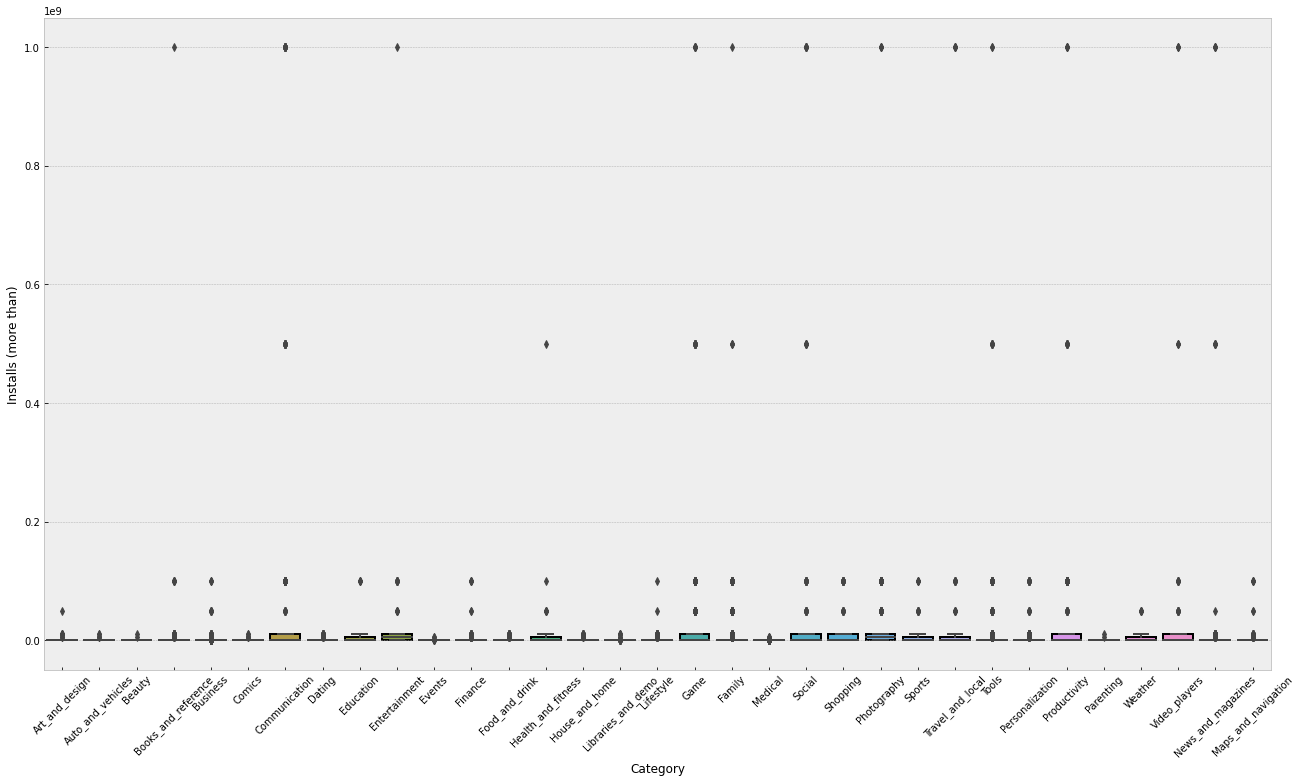

In [18]:
plt.figure(figsize = (22, 12))
ax = sns.boxplot(x='Category', y='Installs (more than)', data=df_categorical_values)
plt.setp(ax.artists, alpha=1, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

En este gráfico podemos observar que solo 12 categorías de aplicaciones llegan a tener más de 1000000000 instalaciones, algunas de estas categorías son "Books and references", "Communication", "Entertainment", "Game", entre otras.

## Distribución de los datos

In [19]:
list(set(df.dtypes.tolist()))


[dtype('float64'), dtype('O'), dtype('int64')]

In [20]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Rating,Reviews,Size (M),Installs (more than),Price
0,4.1,159,19.0,10000,0.0
1,3.9,967,14.0,500000,0.0
2,4.7,87510,8.7,5000000,0.0
3,4.5,215644,25.0,50000000,0.0
4,4.3,967,2.8,100000,0.0


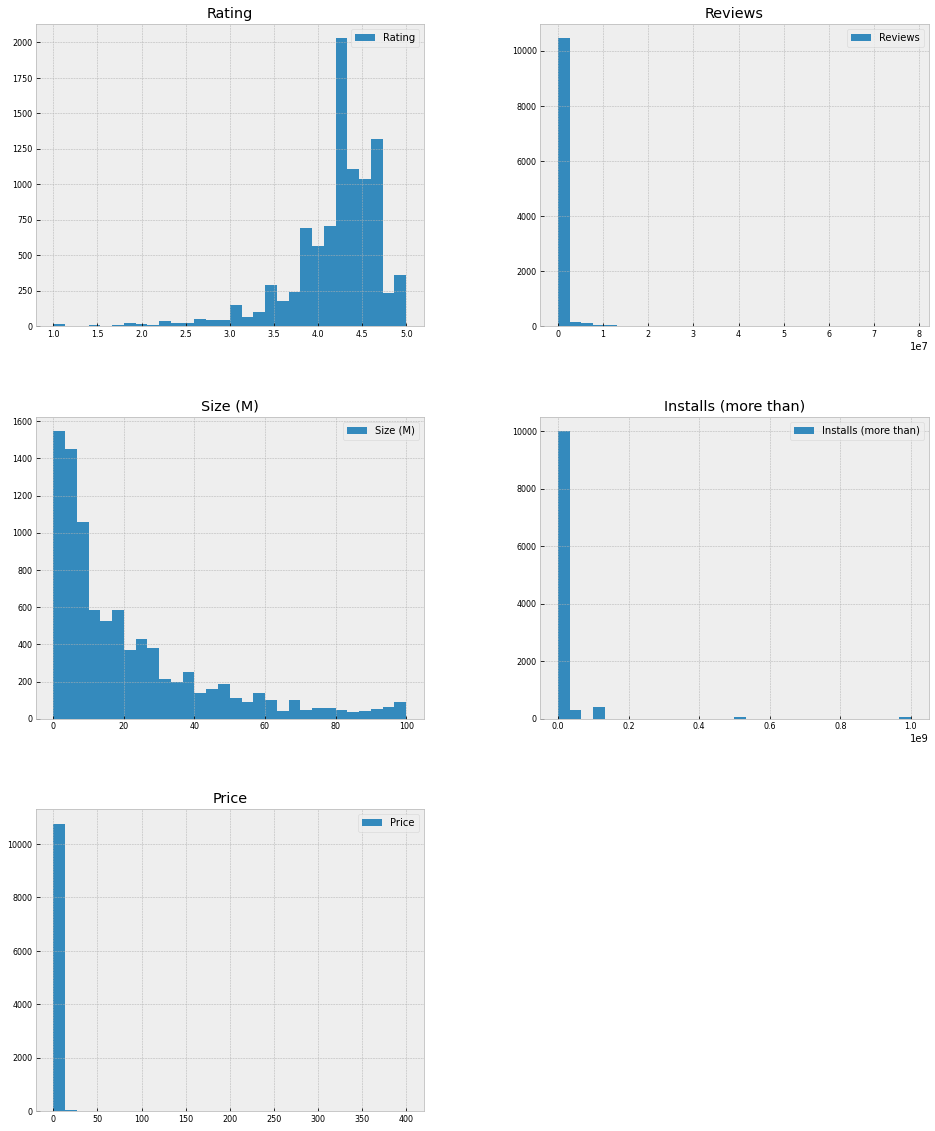

In [21]:
df_num.hist(figsize=(16, 20), bins=30, xlabelsize=8, ylabelsize=8, legend=['abcd','a','a','a','a']);


La grafica de Price, Installs y Reviews tienen comportamientos similares.

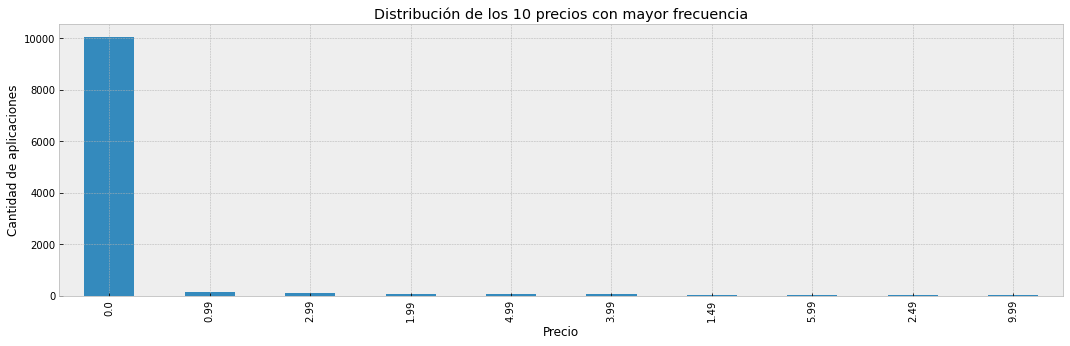

In [23]:
# Plotting a Histogram
df_num["Price"].value_counts().nlargest(10).plot(kind='bar', figsize=(18,5))
plt.title('Distribución de los 10 precios con mayor frecuencia')
plt.ylabel('Cantidad de aplicaciones')
plt.xlabel('Precio');

Entre las aplicaciones con precios menores a 10 dolares del conjunto de datos, prácticamente todas son gratis

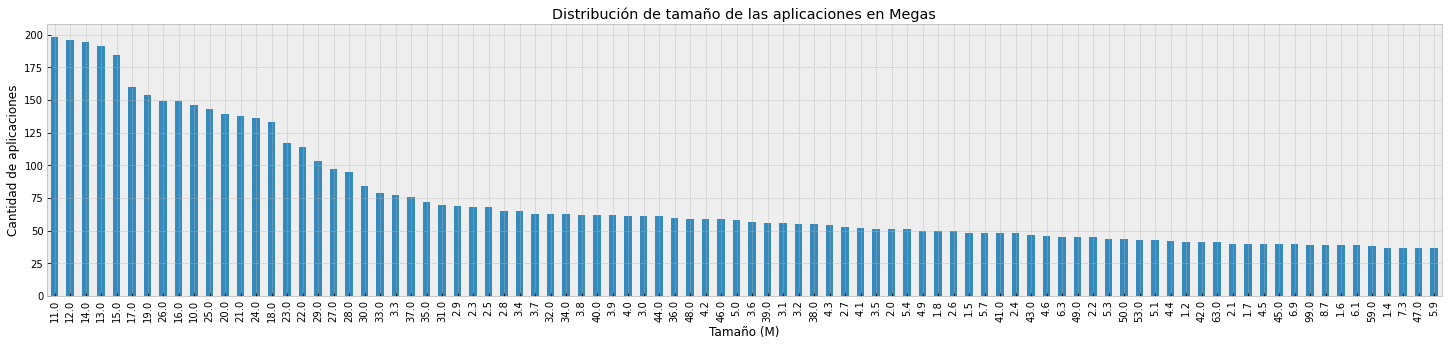

In [ ]:
# Plotting a Histogram
df_num["Size (M)"].value_counts().nlargest(90).plot(kind='bar', figsize=(25,5))
plt.title('Distribución de tamaño de las aplicaciones en Megas')
plt.ylabel('Cantidad de aplicaciones')
plt.xlabel('Tamaño (M)');

El tamaño de las aplicaciones es variado. Los valores más comunes están entre 11 a 37 Megas aproximadamente. Esta distribución de los tamaños de las aplicaciones está sesgada a la derecha.

## Atributos problemáticos

### Duplicados o redudantes


In [24]:
df[df.duplicated(keep=False)]

,App,Category,Rating,Reviews,Size (M),Installs (more than),Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
164,Ebook Reader,Books_and_reference,4.1,85842,37.0,5000000,Free,0.0,Everyone,Books & Reference,"June 25, 2018",5.0.6,4.0 and up
192,Docs To Go™ Free Office Suite,Business,4.1,217730,NaN,50000000,Free,0.0,Everyone,Business,"April 2, 2018",Varies with device,Varies with device
193,Google My Business,Business,4.4,70991,NaN,5000000,Free,0.0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
204,Box,Business,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
213,ZOOM Cloud Meetings,Business,4.4,31614,37.0,10000000,Free,0.0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8642,Wunderlist: To-Do List & Tasks,Productivity,4.6,404610,NaN,10000000,Free,0.0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8653,"TickTick: To Do List with Reminder, Day Planner",Productivity,4.6,25370,NaN,1000000,Free,0.0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8657,ColorNote Notepad Notes,Productivity,4.6,2401017,NaN,100000000,Free,0.0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10048,Airway Ex - Intubate. Anesthetize. Train.,Medical,4.3,123,86.0,10000,Free,0.0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


El conjunto de datos no tiene tuplas duplicadas. Se va a verificar a continuación:



Tamaño antes de intentar limpiar tuplas duplicadas:

In [25]:
df.size


140907

Tamaño despues de intentar limpiar tuplas duplicadas:

In [26]:
df = df.drop_duplicates()
df.size

134628

### Dispersos
El atributo **Current Ver** que corresponde a la versión actual de cada una de las aplicaciones ofrece poco valor por ser tan disperso al ser versiones de un software.